<h1><center>Laboratorio 2: Imagenes üì∑</center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Patricio Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Mat√≠as Vergara Silva
- Nombre de alumno 2: -


### **Link de repositorio de GitHub:** `https://github.com/matiasvergaras/MDS7201`

### Reglas:

- Fecha de entrega: 24 de septiembre (atrasos hasta el 27 de septiembre, 1 pto de descuento por d√≠a)
- **Grupos de 2 personas**
- **Ausentes** deber√°n realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.


### Temas a tratar:

- Programaci√≥n Orientada a Objetos.
- Programaci√≥n Funcional.
- `Numpy` para manejo de datos en arreglos/tensores.




### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas pr√°cticas de programaci√≥n vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de im√°genes sin el uso de librer√≠as.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deber√° ser desarrollado **sin el uso indiscriminado de iteradores nativos de python (aka "for", "while")**. La idea es que aprendan a exprimir al m√°ximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante m√°s eficientes que los iteradores nativos sobre arreglos.

El lab estar√° basado en algunos conceptos b√°sicos de procesamiento de im√°genes, por lo que te iremos guiando, paso a paso por cada uno de los t√≥picos a desarrollar.

## Descripci√≥n del laboratorio.

En Data Science son m√∫ltiples las aplicaciones que exigen el uso exhaustivo de listas de varias dimensiones. Estas entidad reciben formalmente el nombre de **arreglos o tensores**.

Pensemos en que queremos almacenar objetos en un casillero com√∫n y corriente: podemos pensar que este puede ser representado por una matriz de dos dimensiones: alto y ancho. ¬øQue suceder√° si este casillero nos queda peque√±o y queremos guardar m√°s informaci√≥n del mismo tipo?: La soluci√≥n es simple es agregar otro casillero. Esto puede ser pensado como el aumento de la dimensi√≥n de nuestro objeto, pasando a ser ahora (alto, ancho, id casillero). Esto no es otra cosa que un **tensor de 3 dimensiones**.

<br>
<center>
<img src="https://drive.google.com/uc?export=view&id=1tb7popMBUSSj4YzD-Ypytoo6n7PbXzuJ" width=300 height=300 />
</center>
<br>

### ¬øBueno y que tiene que ver todo esto con las im√°genes?

Una imagen es una representaci√≥n visual de una matriz que contiene de n√∫meros que describen intensidades de color (llamados p√≠xeles). Esto visto desde la perspectiva de una imagen en blanco y negro, vendria siendo una matriz que reune las diferentes intensidades de los pixeles desde 0 a 255.

<br>
<center>
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png" width=500 height=500 alt="Representaci√≥n de una imagen" />
</center>
<br>

Cuando las im√°genes poseen colores, las im√°genes vendr√≠an siendo "sin querer queriendo", una bella representaci√≥n de lo que es un tensor: estas pueden ser representadas por un tensor de 3 dimensiones que les dan el *ancho, alto y el canal*, en donde son alojados los colores de la imagen.

<br>
<center>
<img src="https://miro.medium.com/max/2146/1*icINeO4H7UKe3NlU1fXqlA.jpeg" width=300 height=300 alt="Representaci√≥n de una imagen" />
</center>
<br>

Como pueden ver, la imagen puede ser interpretada como un tensor de tres dimensiones(un ancho, un alto y la intensidad de cada color) en el a cada posici√≥n $(i,j)$ de la imagen, le asociaremos 3 intensidades de colores RGB (Rojo, Verde y Azul). Estas intensidades ir√°n desde el $0$ al $255$. La combinaci√≥n de estos 3 canales nos permitir√° representar gran parte de los colores que encontramos en la naturaleza.

**Instalar paquetes: Si est√°n usando conda**


In [ ]:
import sys

!conda install --yes --prefix {sys.prefix} pillow plotly imageio

"conda" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


**Instalar paquetes: Si est√°n usando pip**


In [ ]:
import sys

!{sys.executable} -m pip install pillow plotly imageio

**En caso de trabajar con colab:**

In [ ]:
try:
    from google.colab import drive

    drive.mount("/content/drive")
    path = "/content/drive/My Drive/CuerpoDocente/Laboratorios/Lab1-Numpy/"
except: 
    print('Ignorando conexi√≥n drive-colab')

Ignorando conexi√≥n drive-colab



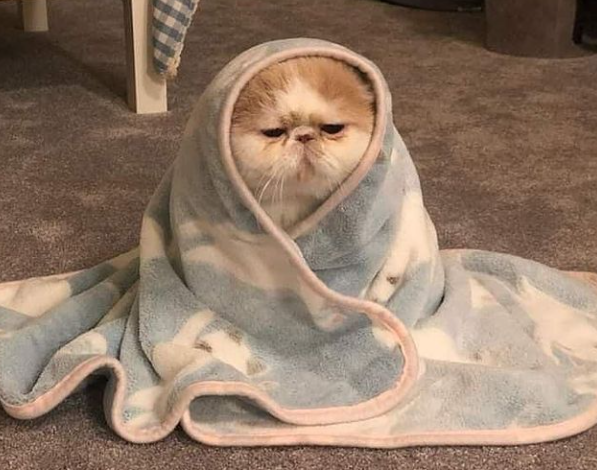

In [ ]:
# En este lab usaremos adicionalmente pillow, una estupenda librer√≠a 
# para manejar im√°genes.
# https://pillow.readthedocs.io/en/stable/

from PIL import Image
import numpy as np
import plotly.express as px

foto = np.array(Image.open("./images_lab/cobija.PNG").convert("RGB"))

# Solo para ejemplificar, usaremos plotly (NO USARLO EN LO QUE QUEDA DEL LAB). 
# Pero en el restro del laboratorio, matplotlib debe ser usado

fig = px.imshow(foto)
fig.show()

Luego, llamando la variable donde alojamos el array podemos ver los valores que componen a esta imagen.

In [ ]:
print(f'N√∫mero de dimensiones: {foto.ndim}')
print(f'N√∫mero de elementos por dimensi√≥n: {foto.shape}')

N√∫mero de dimensiones: 3
N√∫mero de elementos por dimensi√≥n: (470, 597, 3)


Finalmente visualizamos de forma aleatoria los pixeles de cada canal para mostrar sus intensidades.

In [ ]:
print(f"Ejemplo de pixel (10, 200) en el canal 0 - Red: {foto[10, 200, 0]}")
print(f"Ejemplo de pixel (10, 200) en el canal 1- Green: {foto[10, 200, 1]}")
print(f"Ejemplo de pixel (10, 200) en el canal 2- Blue: {foto[10, 200, 2]}")

Ejemplo de pixel (10, 200) en el canal 0 - Red: 97
Ejemplo de pixel (10, 200) en el canal 1- Green: 70
Ejemplo de pixel (10, 200) en el canal 2- Blue: 48


Con lo anterior, suponiendo que la imagen del "gatito" tiene una altura igual a 600 y un ancho de 400, el tensor $G$ que representa a la imagen vendr√° dado por $G[600, 400, 3]$. 

### Videos

Luego, si queremos complejizar a√∫n mas esto y queremos tener tensores que agrupen un conjunto de im√°genes (de igual tama√±o) tendremos lo siguiente:


<br>
<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRk4BWrH_xi_blsx9Y32OTT8k80vI90udG-Yg&usqp=CAU" width=300 height=300 alt="Representaci√≥n de una imagen" />
</center>
<br>

Este conjunto de im√°genes nos generar√° la necesidad de producir una nueva dimensi√≥n, esto producto que las dimensiones son los espacios donde alojamos la informaci√≥n, por esto al conjunto de im√°genes le agregaremos una dimensi√≥n que identifica cada una de las im√°genes del conjunto, quedando representada por el tensor $G[0:n_d, 600, 400, 3]$. Por lo general, cuando tenemos im√°genes con dimensionalidad 4 es porque se tratan de videos, o sea una secuencia de im√°genes; el caso se complejiza a√∫n m√°s cuando agregamos sonido y esto se va a las pailas.

<blockquote>Dato:
La representaci√≥n que posee cada una de las dimensiones puede cambiar dependiendo de la librer√≠a utilizada, en pytorch por ejemplo las dimensiones de una imagen vienen dadas por [batch, canales, alto, ancho] y no [batch, alto, ancho, canales] como en numpy.
</blockquote>


### ¬øYa, pero esto tiene aplicaciones m√°s all√° de guardar informaci√≥n en casilleros?

Para el caso de im√°genes podemos encontrar m√∫ltiples aplicaciones con la manipulaci√≥n de los tensores y operando matem√°ticamente con ellos. Algunas de las aplicaciones m√°s conocidas (y que aplicaremos) son las siguientes:

- **Obtener el negativo de una imagen**: Consiste en obtener el color complementario de una imagen, para esto debemos restar la imagen con la m√°xima intensidad que podemos encontrar en una imagen (o sea 255).
    
    
- **Pasar a escala de grises una imagen**: Los valores RGB se convierten a escala de grises mediante la f√≥rmula NTSC: 

    $$ imagen\_gris = 0.299 * Rojo + 0.587 * Verde + 0.114 * Azul $$
    
    Esta f√≥rmula representa la percepci√≥n relativa de la persona promedio del brillo de la luz roja, verde y azul.
    
    
- **Mejora de contraste**: Son m√∫ltiples las t√©cnicas que nos permiten mejorar el contraste de una imagen, pero, una t√©cnica simple para modificar los contrastes consta en obtener un factor de correcci√≥n llamado F en base al contraste deseado (C). Luego, es aplicado en la diferencia entre la imagen y 128. De esta forma obtenemos R, que es la imagen con la mejora de contraste deseada.

    $$ F=259*(C+255)/(255*(259-C)) $$
    $$ R=F*(img-128)+128 $$
  
  
- **Convoluci√≥n**: Consiste en recorrer una imagen por cada uno de sus canales utilizando una matriz que lleva por nombre Kernel. El kernel, examinar√° los conjuntos de pixeles que recorre, aplicando una multiplicaci√≥n de los valores circundantes ,y sumando todos los valores generados de este producto para generar un nuevo pixel en el tensor de salida.

![conv](https://media3.giphy.com/media/i4NjAwytgIRDW/giphy.gif "miracomorecorre")

---

# Desarrollo

En base a lo explicado y visto en clases, a continuaci√≥n, deben construir cada uno de los programas solicitados en las actividades se√±aladas m√°s abajo. Est√°s, deben ser desarrollados de forma grupal (**2 personas por grupo**) y, la soluci√≥n no debe ser compartida con personas externas al grupo; si se detecta que dos grupos entregan el mismo trabajo, ser√° considerado plagio y se tomaran medidas al respecto.

## 2. Creaci√≥n de Clases y Funciones.

#### Importamos librerias utiles üò∏

In [ ]:
# Libreria Core del lab.
import numpy as np
from pathlib import Path

# Librerias para graficar
import matplotlib.pyplot as plt 

# Nota: Utilizar solo matplot para este lab. NO USAR PLOTLY, 
# ya que tiene problemas de compatibilidad con imagenes

# Funcionalidades dependientes del Sistema Operativo.
import os

# Librerias utiles para cargar y generar Gifs
import imageio
from PIL import Image
from scipy.signal import convolve2d

### 2.1. Carga de imagenes y visualizaci√≥n

Descomprima el archivo "images_lab.zip" en alg√∫n directorio de su computador o plataforma, observen las im√°genes y clasif√≠quenlas a su gusto, para luego en un diccionario cargar y agrupar las diferentes im√°genes (no cree mas de tres llaves).

Hecho esto, visualize dos im√°genes y verifique la dimensionalidad de estas im√°genes con el comando *.shape*. Comente la dimensionalidad de las im√°genes.

### Carga de imagenes en diccionarios

Las siguientes celdas de c√≥digo le permitir√° cargar las im√°genes que utilizaremos durante este laboratorio.

La primera celda implementa la funci√≥n `from_jpg`, la cual, dado una ruta, carga una im√°gen:


In [ ]:
def from_jpg(path):
    ruta = Path(path)
    image = np.array(Image.open(ruta), dtype='int')
    return image


La segunda celda carga las im√°genes y las guarda en un diccionario. 

In [ ]:
images = {
    "gatitos": [
        from_jpg("./images_lab/gato1.jpg"),
        from_jpg("./images_lab/gato2.jpg"),
        from_jpg("./images_lab/gato4.jpg"),
    ],
    "Personas": [
        from_jpg("./images_lab/personas.jpg"),
        from_jpg("./images_lab/gurus.jpg"),
    ],
    "Monos_chinos": [from_jpg("./images_lab/monitos.jpg")],
}

### Plot de imagenes
A continuaci√≥n, utilice la funci√≥n `def show(imagen)` (definida m√°s abajo) para explorar las im√°genes cargadas en la celda anterior.

**Respuesta Esperada**:

In [ ]:
def show(imagen):
    plt.imshow(imagen)
    plt.show()
    x, y, z = imagen.shape
    print(f'Dimensiones de la imagen: {x}x{y} (Alto x Ancho)')

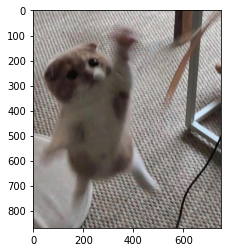

Dimensiones de la imagen: 869x750 (Alto x Ancho)


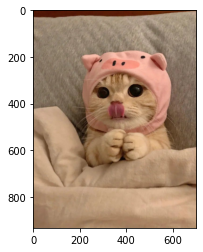

Dimensiones de la imagen: 933x700 (Alto x Ancho)


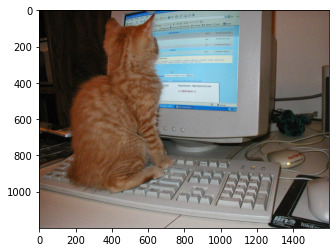

Dimensiones de la imagen: 1200x1600 (Alto x Ancho)


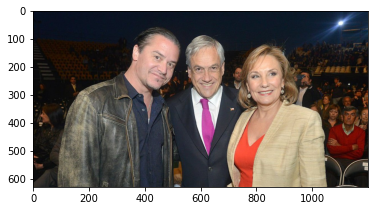

Dimensiones de la imagen: 630x1200 (Alto x Ancho)


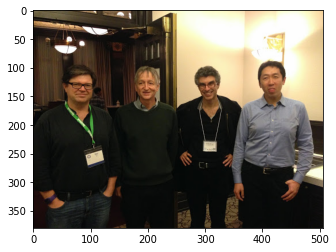

Dimensiones de la imagen: 380x506 (Alto x Ancho)


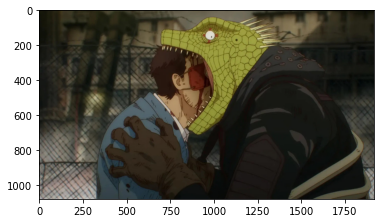

Dimensiones de la imagen: 1079x1917 (Alto x Ancho)


In [ ]:
show(images['gatitos'][0])
# usar show para mostrar las otras im√°genes...
show(images['gatitos'][1])
show(images['gatitos'][2])
show(images['Personas'][0])
show(images['Personas'][1])
show(images['Monos_chinos'][0])



### 2.2 Clase imagenes [2 puntos].

Ahora que sabemos c√≥mo plotear y cargar una imagen, cree una clase llamada "Imagen" la que cumpla las siguientes caracter√≠sticas:

- [X] Un constructor que tome como argumento una imagen y que lo guarde como un atributo. `__init__` debe comprobar que la imagen es un arreglo de numpy (con `isinstance`) y adicionalmente que este tiene 3 dimensiones. En caso contrario, debe levantar excepciones con mensajes correspondientes al error detectado (ustedes definen el mensaje). 
- [ ] Implemente el m√©todo `show()` que muestre la imagen usando la funci√≥n `plt.show()`.
- [ ] Implemente el m√©todo `info()` que retorna un string con las dimensiones de la imagen.
- [ ] Sobrecargue el m√©todo m√°gico `__mul__`, `__add__` y `__sub__` para realizar operaciones matem√°ticas entre el objeto y arrays, int o floats. Realice la funci√≥n pensando que la operaci√≥n se puede aplicar tanto para izquierda y derecha. Como estamos trabajando con im√°genes los outputs deben ser enteros, por esto se le aconseja utilizar `.astype(int)` para transformar los arrays de salida a un formato legible por matplotlib.
- [ ] Es importante que para las operaciones `__add__` y `__sub__` implementen una saturaci√≥n de las im√°genes. Es decir, la suma o resta deben dar como valor m√°ximo 255 y/o como valor m√≠nimos mayores o iguales a 0.
- [ ] Para el caso de `__mul__` deben implementar un m√©todo que nos permita saturar las im√°genes (es decir que los valores del array no sobrepasen 255) y tambi√©n no nos permita obtener valores inferiores a cero.

Implementadas los m√©todos, compruebe que la funcionalidad es la correcta mediante la ejecuci√≥n de los asserts incluidos un par de celdas m√°s abajo.

> **Notas:** 
- Pueden reutilizar el c√≥digo implementado en las celdas anteriores para implementar los m√©todos `show` e `info` . Sin embargo, No invoquen directamente esas funciones.
- La idea es que la imagen contenida en la clase sea inmutable, por ende, todos los metodos que modifiquen la imagen contenida en el objeto deberan retornar un nuevo objeto de la clase `Imagen` que contenga la imagen modificada.

In [ ]:
class Imagen:
    """Clase contenedora de im√°genes"""
    
    def __init__(self, img):
        if isinstance(img, np.ndarray):
            if img.ndim != 3:
                raise ("El argumento debe ser un arreglo de numpy de solo 3 dimensiones")
            if img.shape[-1] != 3:
                raise (
                    "El argumento debe ser un arreglo de numpy de solo 3 dimensiones "
                    "tal que la √∫ltima dimensi√≥n solo tiene 3 canales"
                )
            self.imagen = img
        else:
            raise TypeError(
                "Debes entregar un arreglo de numpy como argumento del constructor de "
                "Imagen"
            )

    def show(self):
        """Muestra la im√°gen contenida en la propiedad imagen usando plotly.
        Lo mismo que la funci√≥n mostrar_imagen.
        """
        plt.imshow(self.imagen)
        plt.show()

     
     # El enunciado habla de retornar string, pero el comentario dice imprimir
     # las caracter√≠sticas. Seguir√© esto √∫ltimo
    def info(self):
        """ Imprime las caracter√≠sticas de la imagen cargada: Alto y ancho.
        """
        x, y, z = self.imagen.shape
        print(f'Dimensiones de la imagen: {x}x{y} (Alto x Ancho)')


    def __add__(self, other):
        """Redefine la operaci√≥n + entre imagen y escalar.

        # Idea, usar indexado condicial (similar a los filtros de pandas).
        # Sumar y luego que en cada pixel mayor a 255 sea asignado el m√°ximo.
        # Ver los tests para mas informaci√≥n.

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que ser√° sumado a cada pixel de la imagen
        """
        suma = None

        # suma escalar
        if isinstance(other, int) or isinstance(other, float):
          suma = self.imagen + other

        # suma imagen con imagen
        elif isinstance(other, np.ndarray):
          # mismas dimensiones
          if self.imagen.shape == other.shape:
            suma = self.imagen + other

          # imagen con arreglos 
          elif self.imagen.shape[0] == other.shape[0] and other.shape[1] == 1 and other.shape[2] == 1:
            suma = self.imagen + other

          elif self.imagen.shape[1] == other.shape[1] and other.shape[0] == 1 and other.shape[2] == 1:
            suma = self.imagen + other

          elif self.imagen.shape[2] == other.shape[2] and other.shape[0] == 1 and other.shape[1] == 1:
            suma = self.imagen + other

          else:
            raise Exception("Las dimensiones de la imagen a sumar {} no coinciden con las de la imagen base {}".format(
                str(other.shape), str(self.imagen.shape)))
        else: 
          raise Exception('La suma requiere un objeto de tipo {}, pero se recibi√≥ {}'.format("int/float/np.ndarray", type(other)))
        # si todo salio bien, hacemos threshold inf. y sup.
        suma[suma < 0] = 0
        suma[suma > 255] = 255
        # convertimos a int
        suma = suma.astype(int)
        return Imagen(suma)

    def __radd__(self, other):
        """Operaci√≥n conmutativa de __add__.

        Hint: deber√≠a llamar a __add__...

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que ser√° sumado a cada pixel de la imagen
        """
        suma = self.__add__(other)
        return suma

    def __sub__(self, other):
        """Redefine la operaci√≥n + entre imagen y escalar.

        # Idea, usar indexado condicial (similar a los filtros de pandas).
        # Restar y luego que en cada pixel mayor a 255 sea asignado el m√°ximo.
        # Caso similar para valores menores a 0, donde debera asignar el minimo a esos pixeles
        # Ver los tests para mas informaci√≥n.

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que ser√° sumado a cada pixel de la imagen
        """
        resta = None
        if isinstance(other,int):
          resta = self.imagen - other
        elif isinstance(other,np.ndarray):
          if self.imagen.shape == other.shape:
            resta = self.imagen - other
          elif self.imagen.shape[0] == other.shape[0] and other.shape[1] == 1 and other.shape[2] == 1:
            resta = self.imagen - other
          elif self.imagen.shape[1] == other.shape[1] and other.shape[0] == 1 and other.shape[2] == 1:
            resta = self.imagen - other
          elif self.imagen.shape[2] == other.shape[2] and other.shape[0] == 1 and other.shape[1] == 1:
            resta = self.imagen - other
          else:
            raise Exception("Las dimensiones de la imagen, con other no coinciden. Dimensiones de imagen" + str(self.imagen.shape) + ", dimensiones de other" + str(other.shape) )
        else: 
          raise Exception('La estructura de dato de other no es compatible con la imagen')
        resta[resta>255] = 255
        resta[resta<0] = 0
        return Imagen(resta)

    def __rsub__(self, other):
        """Operaci√≥n conmutativa de __sub__.

        Hint: deber√≠a llamar a __sub__...

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que ser√° sumado a cada pixel de la imagen
        """
        return self.__sub__((-1)*other)

    def __mul__(self, other):
        """Redefine la operaci√≥n + entre imagen y escalar.

        # Idea, usar indexado condicial (similar a los filtros de pandas).
        # Sumar y luego que en cada pixel mayor a 255 sea asignado el m√°ximo y 
        # cada valor inferior a 0 debe ser 0.
        # Ver los tests para mas informaci√≥n.

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que ser√° sumado a cada pixel de la imagen
        """
        if not (isinstance(other, np.ndarray) or isinstance(other, int) or isinstance(other, float)):
          raise Exception('La multiplicaci√≥n requiere un objeto de tipo {}, pero se recibi√≥ {}'.format(
              "int/float/np.ndarray", type(other)))
        mult = self.imagen * other
        mult[mult>255] = 255
        mult[mult<0] = 0
        mult = mult.astype(int)
        return Imagen(mult.astype(int))

    def __rmul__(self, other):
        """Operaci√≥n conmutativa de __mul__.

        Hint: deber√≠a llamar a __mul__...

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que ser√° sumado a cada pixel de la imagen
        """
        return self.__mul__(other)

**Resultados esperados:**

In [ ]:
gatito = Imagen(images["gatitos"][1])
gurus = Imagen(images["Personas"][1])

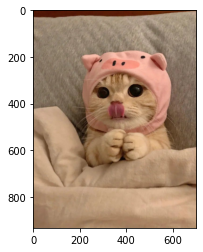

Dimensiones de la imagen: 933x700 (Alto x Ancho)


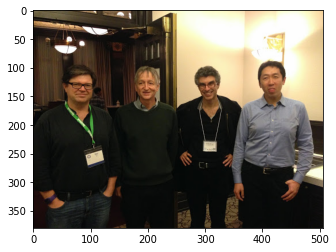

Dimensiones de la imagen: 380x506 (Alto x Ancho)


In [ ]:
# Test show e info.
gatito.show()
gatito.info()

gurus.show()
gurus.info()

In [ ]:
# Tests de los overload de operadores.

# Test __add__
# Idea del test: Todos los elementos de la imagen deben ser a lo m√°s 255.

# Test __add__
assert np.max((gatito + 1000).imagen) == 255

# Test __radd__
assert np.max((1000 + gatito).imagen) == 255

# Test __sub__
assert np.min((gatito - (-1000)).imagen) == 255

# Test __sub__
assert np.max((gatito - 1000).imagen) == 0

# Test __rsub__
assert np.min((1000 - gatito ).imagen) == 255

# Test __mul__ (probar minimo)
assert np.max((-555555 * gatito).imagen) == 0

# Test __mul__ (probar maximo)
assert np.max((555555*gatito).imagen) == 255

# Test __rmul__ (probar minimo)
assert np.max((gatito*-555555).imagen) == 0

# Test __rmul__ (probar maximo)
assert np.max((gatito*555555).imagen) == 255


### 2.3 Clase de Procesamiento de Imagenes [2 puntos]

Ahora que comprenden las diferentes dimensiones que componen a una imagen (en la pr√°ctica), ahora realizaremos diferentes tareas de procesamiento de im√°genes. Para esto, deben crear una clase llamada "`LibImagen`" que cumpla los siguientes requisitos:

- [ ] Pasar una imagen a escala de grises, para esto utilice la ecuaci√≥n (1) expuesta en este mismo notebook.
- [ ] Obtener los canales R, G y B de forma individual.
- [ ] Crear una funci√≥n que pase a negativo de la imagen alojada.
- [ ] Mejorar el contraste de una imagen.
- [ ] Realizar una convoluci√≥n sobre la imagen.
- [ ] Documentar la clase creada y verificar la documentaci√≥n con el comando help().


> **Nota üóíÔ∏è**: Todo m√©todo debe tomar una Imagen y retornar una nueva Imagen.

In [ ]:
class LibImagen():

    def to_negative(self, img_in):
        """Convierte imagen a negativo.

        Parameters
        ----------
        img_in : np.ndarray
            3D Array (Tensor) que contiene imagen a procesar.

        Returns
        -------
        np.ndarray
            3D Array (Tensor) con la imagen procesada.
            Nota: El tipo del arreglo retornado es "int".
        """
        img_out = 255 - img_in.imagen.copy()
        return Imagen(img_out)
    
    def to_gray(self, img_in):
        """
        Transforma una imagen en RGB a la escala de grises. 

        Parameters
        ----------
        img_in : np.ndarray
            3D Array (Tensor) que contiene una imagen.

        Returns
        -------
        np.array
            3D Array (Tensor) que contiene una imagen con 3 canales. 
            Los 3 canales deben tener los mismos valores.
            Nota: El tipo del arreglo retornado es "int".
        """
        img_in = img_in.imagen.copy()
        img_gris = 0.299 * img_in[:,:,0] + 0.587 * img_in[:,:,1]+ 0.114 * img_in[:,:,2]
        img_out = img_in
        img_out[:,:,0] = img_gris
        img_out[:,:,1] = img_gris
        img_out[:,:,2] = img_gris
        return Imagen(img_out)
    
    def get_channel(self, img_in, channel):
        """Obtiene un canal de un color seteando el resto de los canales en 0.

        Parameters
        ----------
        img_in : Imagen
            3D Array (Tensor) que contiene una imagen.
        channel : str
            Nombre del canal que ser√° seleccionado. Valores posibles: ('r','g' o 'b').

        Returns
        -------
        np.array: 
            3D Array (Tensor) que contiene una imagen con 3 canales. 
            Solo el canal seleccionado debe tener valores distintos a 0.
            Nota: El tipo del arreglo retornado es "int".
        """
        img_out = img_in.imagen.copy()
        img_zeros = img_in.imagen.copy()
        channels_correspondance = {'r': 0, 'g': 1, 'b': 2}
        channel_to_keep = channels_correspondance[channel]
        img_zeros[:, :, :] = 0
        img_zeros[:, :, channel_to_keep] = img_out[:,:, channel_to_keep]
        if channel not in channels_correspondance.keys():
          raise Exception('Ingrese un canal de color v√°lido (r,g,b)')
        return Imagen(img_zeros)

    def set_contrast(self, img_in, C):
        """Mejora el contraste de una imagen.

        Parameters
        ----------
        img_in : Imagen
            3D Array (Tensor) que contiene una imagen.
        C : float
            Par√°metro que define el ajuste de contraste.

        Returns
        -------
        np.array
            3D Array (Tensor) que contiene una imagen con 3 canales modificados.
            Nota: El tipo del arreglo retornado es "int".
            
        """
        img_out = Imagen(img_in.imagen.copy())
        F = 259*(C+255)/(255*(259-C))
        R = F*(img_out - 128) + 128
        return R
    
    def conv_channel(self, img_in, kernel):
        """Recibe una objeto de la clase Imagen y un kernel (ndarray 2-dimensional)
         y retorna la convoluci√≥n entre la imagen y el kernel.

        Parameters
          ----------
          img_in : Imagen
          kernel : nd array de 2 dimensiones con largo y ancho menor o igual a los
          de img_in.

        Returns
        -------
        Imagen
            Imagen de 3 canales resultante de la convoluci√≥n entre los par√°metros.
        """
        img = img_in.imagen
        img_out = []
        for i in range(img.shape[-1]):
            img_channel = convolve2d(img[:, :, i], 
                                     kernel, 
                                     mode="same", 
                                     boundary="symm")
            img_out.append(img_channel)
        new_image = np.stack(img_out, axis=2)
        new_image[new_image>255], new_image[new_image<0] = 255, 0
        return Imagen(new_image.astype(int))

### 2.4 Probar [0,5 puntos]

**Respuesta Esperada**:

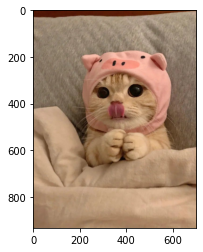

Negativo


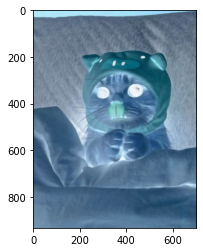

Grayscale


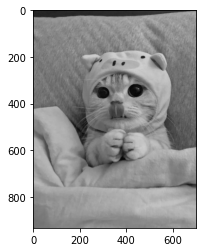

Selecci√≥n de Canales


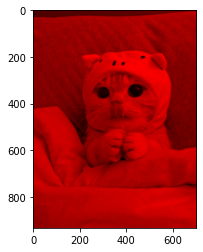

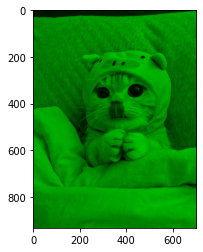

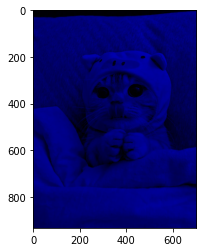

Mejora de Contraste


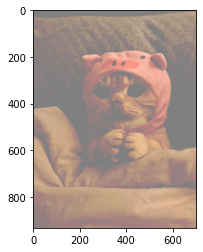

Convoluci√≥n


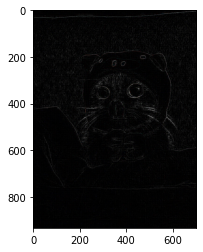

In [ ]:
gatito = Imagen(images["gatitos"][1])

gatito.show()

lib = LibImagen()

print('Negativo')
lib.to_negative(gatito).show()

print('Grayscale')
lib.to_gray(gatito).show()

print('Selecci√≥n de Canales')
lib.get_channel(gatito, "r").show()
lib.get_channel(gatito, "g").show()
lib.get_channel(gatito, "b").show()

print('Mejora de Contraste')
lib.set_contrast(gatito, 0).show()

print('Convoluci√≥n')
kernel = np.array([[-1, -1,  -1], 
                   [-1,  8,  -1], 
                   [-1, -1,  -1]])

lib.conv_channel(gatito, kernel).show()

In [ ]:
help(LibImagen) 

Help on class LibImagen in module __main__:

class LibImagen(builtins.object)
 |  Methods defined here:
 |  
 |  conv_channel(self, img_in, kernel)
 |      Recibe una objeto de la clase Imagen y un kernel (ndarray 2-dimensional)
 |       y retorna la convoluci√≥n entre la imagen y el kernel.
 |      
 |      Parameters
 |        ----------
 |        img_in : Imagen
 |        kernel : nd array de 2 dimensiones con largo y ancho menor o igual a los
 |        de img_in.
 |      
 |      Returns
 |      -------
 |      Imagen
 |          Imagen de 3 canales resultante de la convoluci√≥n entre los par√°metros.
 |  
 |  get_channel(self, img_in, channel)
 |      Obtiene un canal de un color seteando el resto de los canales en 0.
 |      
 |      Parameters
 |      ----------
 |      img_in : Imagen
 |          3D Array (Tensor) que contiene una imagen.
 |      channel : str
 |          Nombre del canal que ser√° seleccionado. Valores posibles: ('r','g' o 'b').
 |      
 |      Returns
 |    

#### Implementar 5 Kernels y probarlos con las imagenes

Referencia: 
https://en.wikipedia.org/wiki/Kernel_(image_processing)



```
# Los filtros que implementamos tienen su origen principalmente en t√©cnicas de recuperaci√≥n de informaci√≥n multimedia, espec√≠ficamente en lo que se refiere a detecci√≥n de bordes, donde la t√©cnica consiste en "potenciar" el contraste en conjuntos de pixeles que siguen cierta orientaci√≥n a la vez que se disminuye la intensidad del resto.

El kernel 1, por ejemplo, es un kernel para bordes verticales. Cuando se encuentra con un borde, la linea de pixeles a la izquierda del borde se va a negro (por la columna de -3) y la linea de pixeles que arma el borde se va a blanco (por la columna de 3), resultando as√≠ en un gato con casi todos sus bordes verticales bien marcados.

El kernel 2, sigue la misma idea pero para la direcci√≥n horizontal. Notar que se marcan muchos m√°s contornos porque la imagen tiene m√°s de estos horizontales que verticales, sin embargo, se pierde gran parte de los bordes que el kernel 1 detecta.

El kernel 3, por otro lado, busca bordes diagonales (derecha arriba - izquierda abajo). Notar que los bigotes de la derecha del gatito siguen justamente este patr√≥n y as√≠ lo evidencia la convoluci√≥n.

El kernel 4 es una t√©cnica m√°s avanzada de detecci√≥n de bordes horizontales, correspondiente a la matriz Gx del Operador Sobel (https://es.wikipedia.org/wiki/Operador_Sobel)

El kernel 5, por √∫ltimo, es un experimento tratando de atrapar los ojos del gato (un gran c√≠rculo o cuadrado oscuro con brillo al medio). Funciona relativamente bien, y atrapa tambi√©n los c√≠rculos del gorrito de cerdo.
```



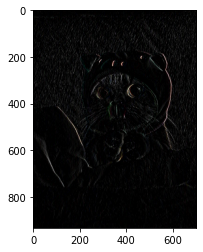

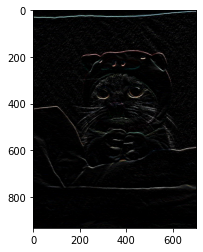

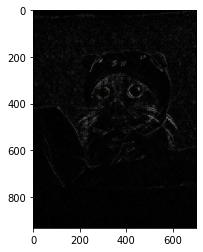

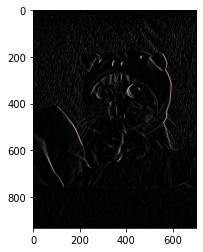

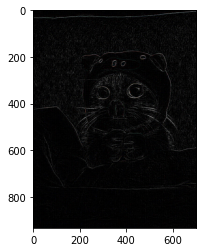

In [ ]:
# Convoluci√≥n
kernel_1 = np.array([[-3, 3], [-3, 3]])
kernel_2 = np.array([[3, 3], [-3, -3]])
kernel_3 = np.array([[10, -10], [-10, 10]])
kernel_4 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_5 = np.array([[-1, -1, -1], [-1, 5, -1], [-1, 5, -1], [-1, -1, -1]])

lib.conv_channel(gatito, kernel_1).show()
lib.conv_channel(gatito, kernel_2).show()
lib.conv_channel(gatito, kernel_3).show()
lib.conv_channel(gatito, kernel_4).show()
lib.conv_channel(gatito, kernel_5).show()



## 3. Secuencias y Detecci√≥n de Movimiento


### 3.2. Secuencia de Imagenes [1,5 punto]


A continuaci√≥n, deben programar una funci√≥n que nos permite resaltar los objetos en movimientos de una secuencia de im√°genes. Para esta parte del laboratorio, deber√° utilizar las im√°genes dispuestas en la carpeta `secuencia_plaza` del archivo zip subido a material docente. 

Primero que todo, cargue la secuencia de im√°genes que se encuentran en el directorio. Para esto, se recomienda utilizar el comando `os.listdir(dir)`, ya que este le facilitar√° la carga de un gran n√∫mero de im√°genes (pruebe el comando y vea que sucede).

In [ ]:
path = "./secuencia_plaza/"
img_names = os.listdir(path)

imagenes = np.array(list(map(lambda img: np.array(Image.open(path + img)), img_names)))



![plaza se mueve](https://media0.giphy.com/media/ZAzlopoHETs5lZQ6EZ/giphy.gif "plaza")

Para realizar este ejercicio utilizaremos un m√©todo super b√°sico para la eliminaci√≥n de fondo. Para esto sigue la siguiente receta:
 1. Pase a escala de grises todas las im√°genes secuenciales.
 2. Almacene en una variable la resta de las im√°genes consecutivas.

   $$ imagen\_out = imagen(t) - imagen(t+1) $$

 3. Establezca un umbral para eliminar algunos artefactos. Pruebe con al menos 3 umbrales.

$$ imagen\_out = imagen\_out> Umbral $$

**Nota**: No es necesario que construya una clase para esta parte.

In [187]:
def dect_mov(sec_img, umbral=120):
    my_cv2 = LibImagen()
    sec_out = []
    for i in range(0, len(sec_img)-1):
        img_1 = Imagen(sec_img[i])
        img_2 = Imagen(sec_img[i+1])
        img_1 = my_cv2.to_gray(img_1)
        img_2 = my_cv2.to_gray(img_2)
        img_res = img_1.imagen - img_2.imagen
        img_res[img_res >= umbral] = 0
        sec_out.append(img_res)
    return sec_out

### 3.3 Resultado

Ahora es tiempo de relajarse y ver si nuestro experimento logra resaltar los objetos en movimiento de esta pol√©mica Plaza, para esto solo ejecute el siguiente C√≥digo y espere. 

In [188]:
imageio.mimsave('plaza.gif', dect_mov(imagenes))

**Ejemplo de resultado esperado:**


![resultados](https://media3.giphy.com/media/SKV3bgUzHt0MLJTWW2/giphy.gif "res")

# Conclusi√≥n
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los d√≠as de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.giphy.com/media/5xtDaroSIXzLa6dvfI4/giphy.gif "cerati")


### Referencias lab 1.

- http://www.cs.cornell.edu/cv/SummerSchool/Introduction.pdf
- https://en.wikipedia.org/wiki/Tensor
- https://support.ptc.com/help/mathcad/es/index.html#page/PTC_Mathcad_Help/example_grayscale_and_color_in_images.html
- http://w3.unpocodetodo.info/canvas/negativo.php
- http://www.dfstudios.co.uk/articles/programming/image-programming-algorithms/image-processing-algorithms-part-5-contrast-adjustment/

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>